In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
inspector = inspect(engine)

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
mcolumns = inspector.get_columns('measurement')
#mcolumns
scolumns = inspector.get_columns('station')
#scolumns

In [22]:
for column in mcolumns:
    print(column['name'])

id
station
date
prcp
tobs


In [23]:
for column in scolumns:
    print(column['name'])


id
station
name
latitude
longitude
elevation


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [25]:
# Calculate the date 1 year ago 8/23/2017 from the last data point in the database
sdate = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
pdata = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= sdate).all()
#pdata

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
pdf = pd.DataFrame(pdata, columns=['date', 'prcp'])
pdf = pdf.sort_values('date')
pdf.set_index(pdf['date'],inplace = True)
#pdf

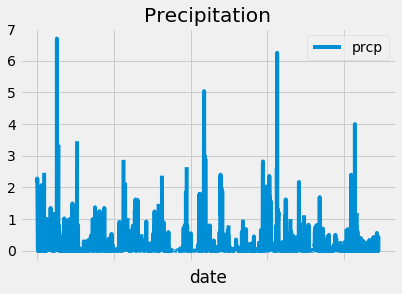

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
pchart = pdf.plot(kind="line", title="Precipitation", grid=True)

In [29]:
pdf.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
session.query(Measurement.station).\
        group_by(Measurement.station).count()

9

In [31]:
adata = session.query(Measurement.station, func.count(Measurement.station)).\
        order_by(func.count(Measurement.station).desc()).\
        group_by(Measurement.station).all()
adata

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
desc_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.date >= '08-23-2016').\
            filter(Measurement.station == 'USC00519281').all()
desc_data

[(54.0, 85.0, 71.66378066378067)]

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram   
tdata = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= sdate).\
            filter(Measurement.station == 'USC00519281').\
            order_by(Measurement.date).all()
tdf = pd.DataFrame(tdata[:], columns=['station','date','tobs'])
tdf

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0
5,USC00519281,2016-08-29,78.0
6,USC00519281,2016-08-30,77.0
7,USC00519281,2016-08-31,78.0
8,USC00519281,2016-09-01,80.0
9,USC00519281,2016-09-02,80.0


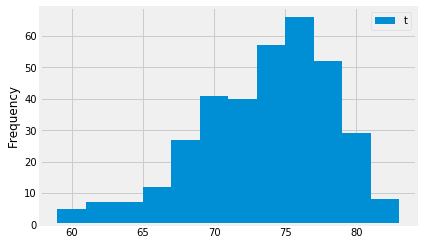

In [37]:
bins = [59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]

plt.hist(tdf['tobs'],bins)
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()

In [35]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
bdata = calc_temps('2016-08-23', '2017-08-23')
bdata

[(58.0, 74.59058295964125, 87.0)]

In [37]:
avg = bdata[0][1]
diff = bdata[0][2] - bdata [0][0]
diff

29.0

Text(0.5, 1.0, 'Trip Avg Temp')

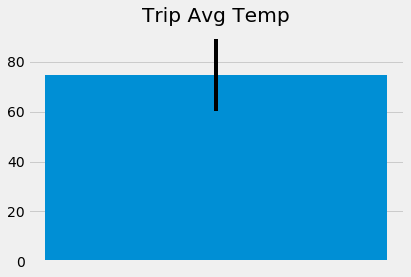

In [41]:
avg = bdata[0][1]
y_pos = np.arange(0, 100)
plt.bar(1, avg)
plt.xticks([0],[''])
plt.errorbar([1],[avg],yerr=diff/2, ecolor = 'black')
plt.title('Trip Avg Temp')